In [1]:
import numpy as np
import cvxpy as cp
import tqdm as tqdm
import matplotlib.pyplot as plt


In [3]:
# consider fully connected, W = 1/n*11^T, delta_w = 0

u_f = 5
L_f = 10

u_phi = 1
L_phi = 1

lambda_2 = 0


# M_f = np.zeros((7,7))
# M_f[4,4]= -(u_f*L_f)/(u_f+L_f)
# M_f[4,5]= 1/2
# M_f[5,4]= 1/2
# M_f[5,5]= -(1)/(u_f+L_f)


# M_phi = np.zeros((7,7))
# M_phi[4,4]= -(u_phi*L_phi)/(u_phi+L_phi)
# M_phi[4,1]= 1/2
# M_phi[1,4]= 1/2
# M_phi[1,1]= -(1)/(u_phi+L_phi)


# M_lambda = np.zeros((7,7))
# M_lambda[3,3]= -1
# M_lambda[1,1]= lambda_2
# # eta = 0.2
M_f = np.zeros((5,5))
M_f[2,2]= -(u_f*L_f)/(u_f+L_f)
M_f[2,3]= 1/2
M_f[3,2]= 1/2
M_f[3,3]= -(1)/(u_f+L_f)


M_phi = np.zeros((5,5))
M_phi[2,2]= -(u_phi*L_phi)/(u_phi+L_phi)
M_phi[2,0]= 1/2
M_phi[0,2]= 1/2
M_phi[0,0]= -(1)/(u_phi+L_phi)


M_lambda = np.zeros((5,5))
M_lambda[4,4]= -1
M_lambda[0,0]= lambda_2
# print(M_0)
# print(M_f)
# print(M_phi)
# print(M_lambda)



A_1 = np.zeros((2,2))
A_1[1,0] = A_1[1,1] = 1
A_1_eta_part = np.zeros((2,2))
A_1_eta_part[0,1] = -1
A_2 = np.zeros((2,2))
A_2[0,0] = A_2[1,1] = 1
A_2_eta_part = np.zeros((2,2))
A_1_eta_part[0,1] = -1

B_1 = np.zeros((2,3))
B_1[0,2] = 1
B_1[1,2] = -1
B_1_eta_part = np.zeros((2,3))
B_1_eta_part[0,1] = -1
B_2 = np.zeros((2,3))
B_2[0,2] = 1
B_2[1,2] = -1
B_2_eta_part = np.zeros((2,3))
B_2_eta_part[0,1] = -1


FG_2 = np.zeros((2, 5))
FG_2[0,1] = FG_2[1,4] = 1



R_2 = np.zeros((5,3))
R_2[0,0] = R_2[2,1] = R_2[3,2] = 1

sigma_f = cp.Variable()
sigma_phi = cp.Variable()
sigma_lambda = cp.Variable()
# sigma_FG = cp.Variable()
# rho = cp.Variable()
rho = 0.999
# eta = cp.Variable()
eta = 0.1
P = cp.Variable((2, 2))
P_constraint = cp.Variable((2, 2))
# P = np.eye(2)
MAT_temp_1 = cp.Variable((5, 5))
MAT_temp_2 = cp.Variable((5, 5))


# constraints += [rho >= 0]
# constraints += [eta >= 0]
# constraints += [rho <= 1]
constraints = [sigma_f >= 0]
constraints += [sigma_phi >= 0]
constraints += [sigma_lambda >= 0]
constraints += [P >> 0]
# questionable, P has to be PD
constraints += [P[0,0] == 1]
# otherwise it's homogeneous and has multiple optimal solutions
constraints += [(-MAT_temp_1 - sigma_f*M_f - sigma_phi*M_phi - sigma_lambda*M_lambda) >> 0]
constraints += [MAT_temp_1[0:2,0:2] == ((A_1 + eta*A_1_eta_part).T@P@(A_1 + eta*A_1_eta_part) - rho*P)]
constraints += [MAT_temp_1[0:2,2:5] == ((A_1 + eta*A_1_eta_part).T@P@(B_1 + eta*B_1_eta_part))]
constraints += [MAT_temp_1[2:,:2] == ((B_1 + eta*B_1_eta_part).T@P@(A_1 + eta*A_1_eta_part))]
constraints += [MAT_temp_1[2:,2:] == ((B_1 + eta*B_1_eta_part).T@P@(B_1 + eta*B_1_eta_part))]

constraints += [(-MAT_temp_2 - sigma_f*M_f - sigma_phi*M_phi - sigma_lambda*M_lambda - FG_2.T@P_constraint@FG_2) >> 0]
constraints += [MAT_temp_2[0:2,0:2] == ((A_2 + eta*A_2_eta_part).T@P@(A_2 + eta*A_2_eta_part) - rho*P)]
constraints += [MAT_temp_2[0:2,2:5] == ((A_2 + eta*A_2_eta_part).T@P@(B_2 + eta*B_2_eta_part))]
constraints += [MAT_temp_2[2:,:2] == ((B_2 + eta*B_2_eta_part).T@P@(A_2 + eta*A_2_eta_part))]
constraints += [MAT_temp_2[2:,2:] == ((B_2 + eta*B_2_eta_part).T@P@(B_2 + eta*B_2_eta_part))]

# (A_1 + eta*A_1_eta_part)
# (A_2 + eta*A_2_eta_part)
# (B_1 + eta*B_1_eta_part)
# (B_2 + eta*B_2_eta_part)
prob=cp.Problem(cp.Minimize(rho), constraints)
# prob=cp.Problem(cp.Maximize(rho), constraints)
prob.solve()


print("The optimal value is", prob.value)
print("A solution is")
print(sigma_f.value, sigma_phi.value)
print("P matrix is:", P.value)
print(prob.value == 0)

The optimal value is 0.999
A solution is
0.49761106726904014 68.07951207638806
P matrix is: [[1.         0.41561658]
 [0.41561658 0.73515345]]
False


1it [00:01,  1.62s/it]/home/ybsun/anaconda3/lib/python3.9/site-packages/cvxpy/problems/problem.py:1294: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
100it [02:49,  1.70s/it]


0.595


1it [00:01,  1.72s/it]/home/ybsun/anaconda3/lib/python3.9/site-packages/cvxpy/problems/problem.py:1294: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
100it [02:54,  1.74s/it]


0.64


0it [00:00, ?it/s]/home/ybsun/anaconda3/lib/python3.9/site-packages/cvxpy/problems/problem.py:1294: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
100it [02:46,  1.66s/it]


0.6950000000000001


14it [00:23,  1.65s/it]/home/ybsun/anaconda3/lib/python3.9/site-packages/cvxpy/problems/problem.py:1294: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
100it [02:47,  1.67s/it]


0.755


1it [00:01,  1.60s/it]/home/ybsun/anaconda3/lib/python3.9/site-packages/cvxpy/problems/problem.py:1294: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
100it [02:48,  1.68s/it]


0.8200000000000001


12it [00:19,  1.62s/it]/home/ybsun/anaconda3/lib/python3.9/site-packages/cvxpy/problems/problem.py:1294: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
100it [02:44,  1.64s/it]


0.88


18it [00:29,  1.65s/it]/home/ybsun/anaconda3/lib/python3.9/site-packages/cvxpy/problems/problem.py:1294: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
100it [02:45,  1.66s/it]


0.935


100it [02:46,  1.66s/it]


0.985


100it [02:42,  1.62s/it]


0.5
no solution


100it [02:42,  1.63s/it]

0.5
no solution


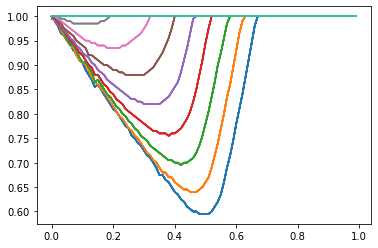

In [10]:
IQC_best_list = np.zeros(10)
resolution = 100
lambda_num = 10

IQC_rho_plot = np.zeros((lambda_num, resolution))
for lambeda_choice in range(lambda_num):
    u_f = 1
    L_f = 2

    u_phi = 1
    L_phi = 2

    lambda_2 = (lambeda_choice/lambda_num)**2
#     lambda_2 = 0.01

    M_f = np.zeros((5,5))
    M_f[2,2]= -(u_f*L_f)/(u_f+L_f)
    M_f[2,3]= 1/2
    M_f[3,2]= 1/2
    M_f[3,3]= -(1)/(u_f+L_f)

    M_phi = np.zeros((5,5))
    M_phi[2,2]= -(u_phi*L_phi)/(u_phi+L_phi)
    M_phi[2,0]= 1/2
    M_phi[0,2]= 1/2
    M_phi[0,0]= -(1)/(u_phi+L_phi)

    M_lambda = np.zeros((5,5))
    M_lambda[4,4]= -1
    M_lambda[0,0]= lambda_2

    A_1 = np.zeros((2,2))
    A_1[1,0] = A_1[1,1] = 1
    A_1_eta_part = np.zeros((2,2))
    A_1_eta_part[0,1] = -1
    A_2 = np.zeros((2,2))
    A_2[0,0] = A_2[1,1] = 1
    A_2_eta_part = np.zeros((2,2))
    A_1_eta_part[0,1] = -1

    B_1 = np.zeros((2,3))
    B_1[0,2] = 1
    B_1[1,2] = -1
    B_1_eta_part = np.zeros((2,3))
    B_1_eta_part[0,1] = -1
    B_2 = np.zeros((2,3))
    B_2[0,2] = 1
    B_2[1,2] = -1
    B_2_eta_part = np.zeros((2,3))
    B_2_eta_part[0,1] = -1
    
    FG_2 = np.zeros((2, 5))
    FG_2[0,1] = FG_2[1,4] = 1
    # R_2 = np.zeros((5,3))
    # R_2[0,0] = R_2[2,1] = R_2[3,2] = 1
    sigma_f = cp.Variable()
    sigma_phi = cp.Variable()
    sigma_lambda = cp.Variable()
    # sigma_FG = cp.Variable()
    # rho = cp.Variable()
    # rho = 0.999
    # eta = cp.Variable()
    # eta = 0.1
    P = cp.Variable((2, 2))
    P_constraint = cp.Variable((2, 2))
    # P = np.eye(2)
    MAT_temp_1 = cp.Variable((5, 5))
    MAT_temp_2 = cp.Variable((5, 5))
    
    eta_selection = np.linspace(0,1,resolution,endpoint=False)
    smallest_rho = 0.5
    rho_selection = np.linspace(smallest_rho,1,resolution,endpoint=False)
    viable = np.zeros((resolution,resolution))
    for i, eta in tqdm.tqdm(enumerate(eta_selection)):
        for j, rho in enumerate(rho_selection):
            constraints = [sigma_f >= 0]
            constraints += [sigma_phi >= 0]
            constraints += [sigma_lambda >= 0]
            constraints += [P >> 0]
            # questionable, P has to be PD
            constraints += [P[0,0] == 1]
            # otherwise it's homogeneous and has multiple optimal solutions
            constraints += [(-MAT_temp_1 - sigma_f*M_f - sigma_phi*M_phi - sigma_lambda*M_lambda) >> 0]
            constraints += [MAT_temp_1[0:2,0:2] == ((A_1 + eta*A_1_eta_part).T@P@(A_1 + eta*A_1_eta_part) - rho*P)]
            constraints += [MAT_temp_1[0:2,2:5] == ((A_1 + eta*A_1_eta_part).T@P@(B_1 + eta*B_1_eta_part))]
            constraints += [MAT_temp_1[2:,:2] == ((B_1 + eta*B_1_eta_part).T@P@(A_1 + eta*A_1_eta_part))]
            constraints += [MAT_temp_1[2:,2:] == ((B_1 + eta*B_1_eta_part).T@P@(B_1 + eta*B_1_eta_part))]

            constraints += [((-MAT_temp_2 - sigma_f*M_f - sigma_phi*M_phi - sigma_lambda*M_lambda- FG_2.T@P_constraint@FG_2)) >> 0]
            constraints += [MAT_temp_2[0:2,0:2] == ((A_2 + eta*A_2_eta_part).T@P@(A_2 + eta*A_2_eta_part) - rho*P)]
            constraints += [MAT_temp_2[0:2,2:5] == ((A_2 + eta*A_2_eta_part).T@P@(B_2 + eta*B_2_eta_part))]
            constraints += [MAT_temp_2[2:,:2] == ((B_2 + eta*B_2_eta_part).T@P@(A_2 + eta*A_2_eta_part))]
            constraints += [MAT_temp_2[2:,2:] == ((B_2 + eta*B_2_eta_part).T@P@(B_2 + eta*B_2_eta_part))]

            # (A_1 + eta*A_1_eta_part)
            # (A_2 + eta*A_2_eta_part)
            # (B_1 + eta*B_1_eta_part)
            # (B_2 + eta*B_2_eta_part)
            prob=cp.Problem(cp.Minimize(rho), constraints)
    #         prob.setSolverParam("numThreads", 4)
            # prob=cp.Problem(cp.Maximize(rho), constraints)
            try:
                prob.solve()
#                 prob.solve(solver=cp.MOSEK, mosek_params={mosek.iparam.num_threads: 8})
#                 prob.solve(solver=cp.MOSEK)
            except:
                continue
            if prob.status not in ["infeasible", "unbounded"]:
    #             print("Problem is solvable for eta, rho:", eta, rho)
                viable[i,j] = 1
    best_eta = eta_selection[np.argmax(np.sum(viable, axis=1))]
    # print(best_eta)
    best_rho = rho_selection[np.argmax(viable[np.argmax(np.sum(viable, axis=1))])]
    print(best_rho)
    IQC_best_list[lambeda_choice] = best_rho
    for step in range(resolution):
        possible = viable[step,:]
        IQC_rho_plot[lambeda_choice, step] = np.sum(viable[step,:])
    if best_eta == 0:
        print("no solution")
        IQC_best_list[lambeda_choice] = 1
    plt.plot(eta_selection, 1-((1-smallest_rho)* IQC_rho_plot.T)/(resolution))
#     plt.imshow(np.flip(np.transpose(viable), axis=0))
#     plt.show()

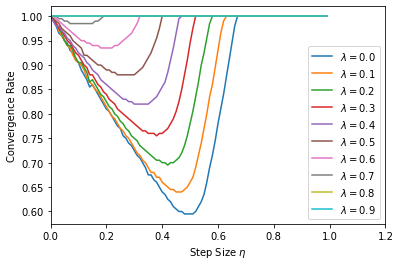

In [12]:
# plt.plot(eta_selection, 1-(IQC_rho_plot.T)/200)
for i in range(10):
    plt.plot(eta_selection, IQC_rho_plot_convert[i], label="$\lambda=$"+str(i/10))

plt.ylabel("Convergence Rate")
plt.xlabel("Step Size $\eta$")
plt.xlim(0,1.2)

plt.legend()
plt.savefig('new_solver.pdf')  

In [11]:
IQC_rho_plot_convert = 1-((1-smallest_rho)*IQC_rho_plot)/(resolution)
# np.save("IQC_rho_plot_f14110", IQC_rho_plot_convert)

In [37]:
EXTRA_best_list = np.zeros(10)
for lambeda_choice in range(10):
    u_f = 1
    L_f = 4

    u_phi = 1
    L_phi = 1

    lambda_1 = (lambeda_choice/20)
    lambda_min = 0
    u_g = u_f 
    alpha = u_g*(1 + lambda_min)/(4*L_f*L_f)
    # lambda_2 = 0.2

    EXTRA_theta  = cp.Variable()
    resolution = 10000
    theta_selection = np.linspace(1,10,resolution,endpoint=False)
    EXTRA_rate = np.zeros(resolution)
#     IQC_rate = np.ones(resolution) * best_rho


    for i, EXTRA_theta in enumerate(theta_selection):
        delta_1 = alpha*(u_g )*(1 - lambda_1)/(EXTRA_theta * alpha* alpha * L_f * L_f + (1 - lambda_1 ))
#         delta_1 = alpha*(u_g )

        delta_2 = (EXTRA_theta - 1)*(u_g*(1 + lambda_min)/2 - alpha* L_f * L_f)* (1 - lambda_1 ) / (EXTRA_theta * u_g * (1+alpha *L_f )* (1+alpha *L_f ))

        best_delta = np.minimum(delta_1,delta_2)

        EXTRA_rate[i] = 1/(1 + best_delta)
#     u_g = u_f 
#     alpha = u_g*(1 + 0)/(4*L_f*L_f)
#     lambda_2 = (lambeda_choice/20)

#     EXTRA_theta  = cp.Variable()
#     resolution = 10000
#     theta_selection = np.linspace(1,10,resolution,endpoint=False)
#     EXTRA_rate = np.zeros(resolution)
#     IQC_rate = np.ones(resolution) * best_rho


#     for i, EXTRA_theta in enumerate(theta_selection):
#         delta_1 = alpha*(u_g )*(1 - lambda_2)/(EXTRA_theta * alpha * L_f * L_f + (1 - lambda_2 ))

#         delta_2 = (EXTRA_theta - 1)*u_g* (1 - lambda_2 ) / (EXTRA_theta * u_g * (1+alpha *L_f )* (1+alpha *L_f ))

#         best_delta = np.minimum(delta_1,delta_2)

#         EXTRA_rate[i] = 1/(1 + best_delta)
    EXTRA_best_list[lambeda_choice] = np.min(EXTRA_rate)

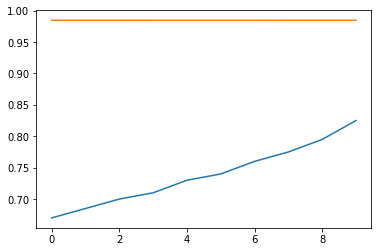

In [42]:
plt.plot(IQC_best_list)
plt.plot(EXTRA_best_list)
np.save("IQC_best_list_1_3", IQC_best_list)
# np.save("EXTRA_best_list_1_10", EXTRA_best_list)


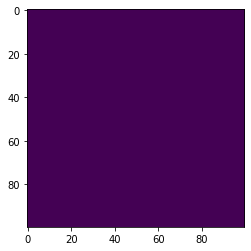

In [48]:
plt.imshow(viable)

100it [04:11,  2.52s/it]
0it [00:00, ?it/s]

0.64


100it [04:10,  2.50s/it]
0it [00:00, ?it/s]

0.845


100it [04:10,  2.51s/it]
0it [00:00, ?it/s]

0.96


100it [04:11,  2.52s/it]

0.5
no solution


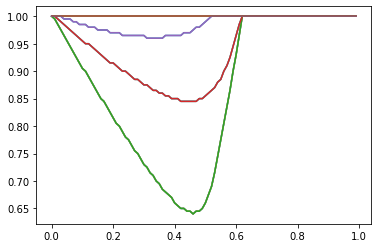

In [23]:
IQC_best_list = np.zeros(10)
resolution = 100
L_num = 4

IQC_rho_plot = np.zeros((L_num, resolution))
for lambeda_choice in range(L_num):
    u_f = 1
    L_f = 2

    u_phi = 1
    L_phi = 2**(lambeda_choice+1)

#     lambda_2 = (lambeda_choice/lambda_num)**2
    lambda_2 = 0.01

    M_f = np.zeros((5,5))
    M_f[2,2]= -(u_f*L_f)/(u_f+L_f)
    M_f[2,3]= 1/2
    M_f[3,2]= 1/2
    M_f[3,3]= -(1)/(u_f+L_f)

    M_phi = np.zeros((5,5))
    M_phi[2,2]= -(u_phi*L_phi)/(u_phi+L_phi)
    M_phi[2,0]= 1/2
    M_phi[0,2]= 1/2
    M_phi[0,0]= -(1)/(u_phi+L_phi)

    M_lambda = np.zeros((5,5))
    M_lambda[4,4]= -1
    M_lambda[0,0]= lambda_2

    A_1 = np.zeros((2,2))
    A_1[1,0] = A_1[1,1] = 1
    A_1_eta_part = np.zeros((2,2))
    A_1_eta_part[0,1] = -1
    A_2 = np.zeros((2,2))
    A_2[0,0] = A_2[1,1] = 1
    A_2_eta_part = np.zeros((2,2))
    A_1_eta_part[0,1] = -1

    B_1 = np.zeros((2,3))
    B_1[0,2] = 1
    B_1[1,2] = -1
    B_1_eta_part = np.zeros((2,3))
    B_1_eta_part[0,1] = -1
    B_2 = np.zeros((2,3))
    B_2[0,2] = 1
    B_2[1,2] = -1
    B_2_eta_part = np.zeros((2,3))
    B_2_eta_part[0,1] = -1

    R_2 = np.zeros((5,3))
    R_2[0,0] = R_2[2,1] = R_2[3,2] = 1

    eta_selection = np.linspace(0,1,resolution,endpoint=False)
    rho_selection = np.linspace(0.5,1,resolution,endpoint=False)
    viable = np.zeros((resolution,resolution))
    for i, eta in tqdm.tqdm(enumerate(eta_selection)):
        for j, rho in enumerate(rho_selection):
            constraints = [sigma_f >= 0]
            constraints += [sigma_phi >= 0]
            constraints += [sigma_lambda >= 0]
            constraints += [P >> 0]
            # questionable, P has to be PD
            constraints += [P[0,0] == 1]
            # otherwise it's homogeneous and has multiple optimal solutions
            constraints += [(-MAT_temp_1 - sigma_f*M_f - sigma_phi*M_phi - sigma_lambda*M_lambda) >> 0]
            constraints += [MAT_temp_1[0:2,0:2] == ((A_1 + eta*A_1_eta_part).T@P@(A_1 + eta*A_1_eta_part) - rho*P)]
            constraints += [MAT_temp_1[0:2,2:5] == ((A_1 + eta*A_1_eta_part).T@P@(B_1 + eta*B_1_eta_part))]
            constraints += [MAT_temp_1[2:,:2] == ((B_1 + eta*B_1_eta_part).T@P@(A_1 + eta*A_1_eta_part))]
            constraints += [MAT_temp_1[2:,2:] == ((B_1 + eta*B_1_eta_part).T@P@(B_1 + eta*B_1_eta_part))]

            constraints += [(R_2.T@(-MAT_temp_2 - sigma_f*M_f - sigma_phi*M_phi - sigma_lambda*M_lambda)@R_2) >> 0]
            constraints += [MAT_temp_2[0:2,0:2] == ((A_2 + eta*A_2_eta_part).T@P@(A_2 + eta*A_2_eta_part) - rho*P)]
            constraints += [MAT_temp_2[0:2,2:5] == ((A_2 + eta*A_2_eta_part).T@P@(B_2 + eta*B_2_eta_part))]
            constraints += [MAT_temp_2[2:,:2] == ((B_2 + eta*B_2_eta_part).T@P@(A_2 + eta*A_2_eta_part))]
            constraints += [MAT_temp_2[2:,2:] == ((B_2 + eta*B_2_eta_part).T@P@(B_2 + eta*B_2_eta_part))]

            # (A_1 + eta*A_1_eta_part)
            # (A_2 + eta*A_2_eta_part)
            # (B_1 + eta*B_1_eta_part)
            # (B_2 + eta*B_2_eta_part)
            prob=cp.Problem(cp.Minimize(rho), constraints)
    #         prob.setSolverParam("numThreads", 4)
            # prob=cp.Problem(cp.Maximize(rho), constraints)
            try:
                prob.solve()
#                 prob.solve(solver=cp.MOSEK, mosek_params={mosek.iparam.num_threads: 8})
#                 prob.solve(solver=cp.MOSEK)
            except:
                continue
            if prob.status not in ["infeasible", "unbounded"]:
    #             print("Problem is solvable for eta, rho:", eta, rho)
                viable[i,j] = 1
    best_eta = eta_selection[np.argmax(np.sum(viable, axis=1))]
    # print(best_eta)
    best_rho = rho_selection[np.argmax(viable[np.argmax(np.sum(viable, axis=1))])]
    print(best_rho)
    IQC_best_list[lambeda_choice] = best_rho
    for step in range(resolution):
        possible = viable[step,:]
        IQC_rho_plot[lambeda_choice, step] = np.sum(viable[step,:])
    if best_eta == 0:
        print("no solution")
        IQC_best_list[lambeda_choice] = 1
    plt.plot(eta_selection, 1-(IQC_rho_plot.T)/(2*resolution))
#     plt.imshow(np.flip(np.transpose(viable), axis=0))
#     plt.show()

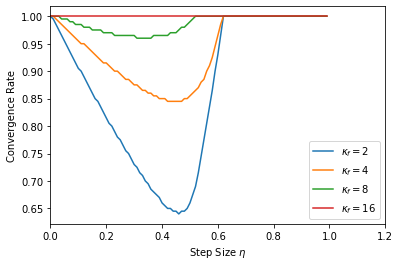

In [24]:
for i in range(L_f_num):
    plt.plot(eta_selection, 1-(IQC_rho_plot[i])/(2*resolution), label="$\kappa_f=$"+str(2**(i+1)))

plt.ylabel("Convergence Rate")
plt.xlabel("Step Size $\eta$")
plt.xlim(0,1.2)

plt.legend()
plt.savefig('change_kappa_phi.pdf')  

Text(0.5, 0, 'condition number of $\\phi$')

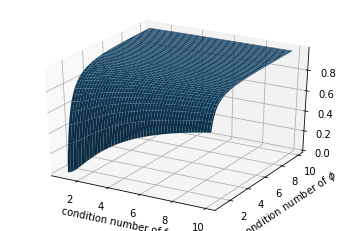

In [30]:
from mpl_toolkits.mplot3d import Axes3D  
mesh_resolution = 100
x = np.linspace(1,10,mesh_resolution,endpoint=False)
y = np.linspace(1,10,mesh_resolution,endpoint=False)

xv, yv = np.meshgrid(x, y, sparse=False, indexing='ij')

opt_rate = np.zeros((mesh_resolution, mesh_resolution))
for i in range(mesh_resolution):
    for j in range(mesh_resolution):
        opt_rate[i,j] = 1- (4*xv[i,j]/((1+xv[i,j])**2*yv[i,j]**2))
        # treat xv[i,j], yv[i,j]
f = plt.figure()
ax = f.gca(projection='3d')

surf = ax.plot_surface( xv, yv, opt_rate)
plt.xlabel("condition number of f")
plt.ylabel("condition number of $\phi$")
plt.zlabel("best poss")

# plt.savefig('two_kappa.pdf')  

Text(0.5, 0, 'spectral gap $\\lambda$')

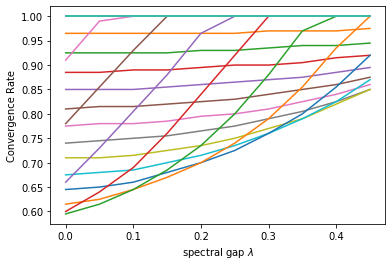

In [14]:
lambda_selection = np.linspace(0,0.5,10,endpoint=False)
IQC_rho_plot = np.load("IQC_rho_plot_f2rho2.npy")
for i in range(100):
    if (i%2)==0:
        plt.plot(lambda_selection, IQC_rho_plot[:,i], label="$\eta=$"+str(i/100))

plt.ylabel("Convergence Rate")
plt.xlabel("spectral gap $\lambda$")
# plt.xlim(0,1.2)

# plt.legend()

(0.5, 1)

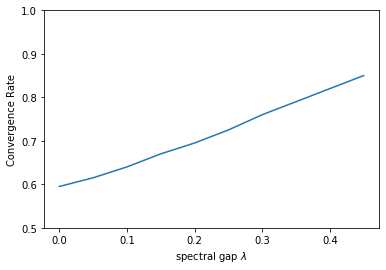

In [20]:
lambda_selection = np.linspace(0,0.5,10,endpoint=False)
IQC_rho_plot = np.load("IQC_rho_plot_f2rho2.npy")
plt.plot(lambda_selection, np.amin(IQC_rho_plot, axis=1), label="$\eta=$"+str(i/100))

plt.ylabel("Convergence Rate")
plt.xlabel("spectral gap $\lambda$")
plt.ylim(0.5,1)
